In [86]:
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.functions import *
from build import morse_complex as mc

In [87]:
data = "data/roads_labels"
files = os.listdir(data)

In [88]:
img = np.load(data+"/"+files[2])

In [89]:
img.shape

(48, 48)

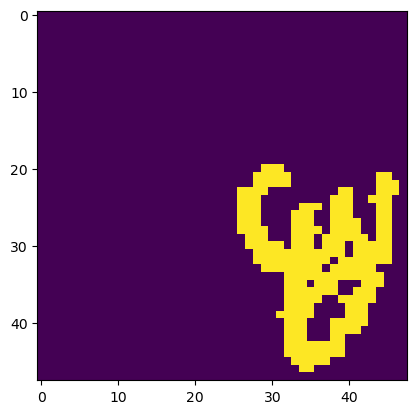

In [90]:
plt.imshow(img)

In [91]:
img2 = np.array([1-img])

In [92]:
img2.shape

(1, 48, 48)

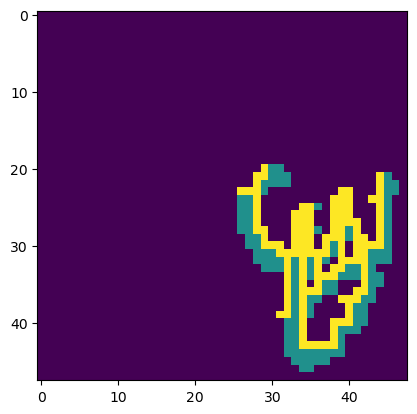

In [93]:
MC = mc.MorseComplex(img2)
MC.process_lower_stars()
MC.extract_morse_skeleton_below(1)
voxels = MC.get_morse_skeleton_below()
skel = np.zeros_like(img2)
for voxel in voxels:
    skel[voxel[0],voxel[1],voxel[2]] = 1
skel = skel[0,:,:]
plt.imshow(skel+img)

[[31, 41, 11, 0], [31, 34, 0, 0], [0, 7, 11, 0]]


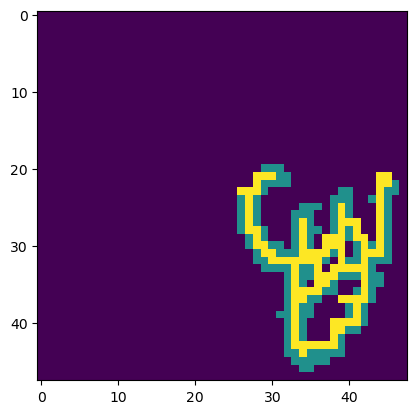

In [102]:
d = distance_transform(img2)
MC = mc.MorseComplex(d)
MC.process_lower_stars()
#MC.cancel_low_persistence_pairs_below(0,0)
MC.extract_morse_skeleton_below(0)
voxels = MC.get_morse_skeleton_below()
skel = np.zeros_like(img2)
for voxel in voxels:
    skel[voxel[0],voxel[1],voxel[2]] = 1
skel = skel[0,:,:]
plt.imshow(skel+img)
print(MC.get_number_of_critical_cells(0))


Canceling pairs < 0
Canceling order:
dimension: >
value: >

Critical cells:
total: 1 11 11 0 --- < 0: 1 4 0 0 --- >= 0: 0 7 11 0                       

[[1, 11, 11, 0], [1, 4, 0, 0], [0, 7, 11, 0]]


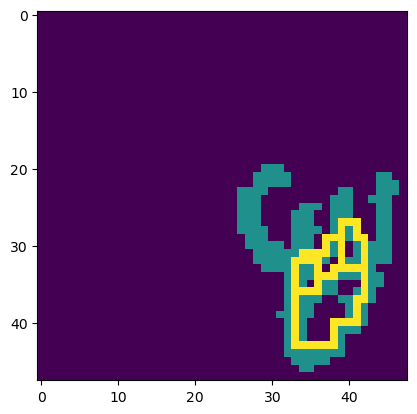

In [97]:
d = distance_transform(img2)
MC = mc.MorseComplex(d)
MC.process_lower_stars()
MC.cancel_pairs_below(0)
MC.extract_morse_skeleton_below(0)
voxels = MC.get_morse_skeleton_below()
skel = np.zeros_like(img2)
for voxel in voxels:
    skel[voxel[0],voxel[1],voxel[2]] = 1
skel = skel[0,:,:]
plt.imshow(skel+img)
print(MC.get_number_of_critical_cells(0))

Critical cells:
total: 22 32 11 0 --- < 0: 22 25 0 0 --- >= 0: 0 7 11 0                    
[[22, 32, 11, 0], [22, 25, 0, 0], [0, 7, 11, 0]]


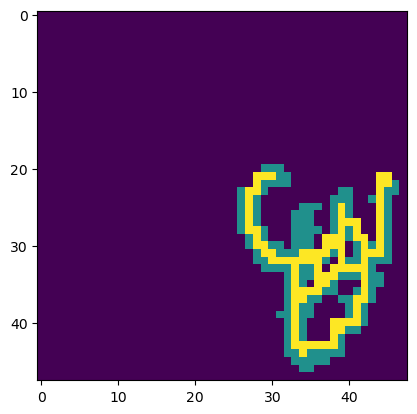

In [96]:
d = distance_transform(img2)
MC = mc.MorseComplex(d)
MC.process_lower_stars()
MC.cancel_low_persistence_pairs_below(0,0.0)
MC.extract_morse_skeleton_below(0)
voxels = MC.get_morse_skeleton_below()
skel = np.zeros_like(img2)
for voxel in voxels:
    skel[voxel[0],voxel[1],voxel[2]] = 1
skel = skel[0,:,:]
plt.imshow(skel+img)
print(MC.get_number_of_critical_cells(0))

Critical cells:
total: 10 20 11 0 --- < 0: 10 13 0 0 --- >= 0: 0 7 11 0                    
[[10, 20, 11, 0], [10, 13, 0, 0], [0, 7, 11, 0]]


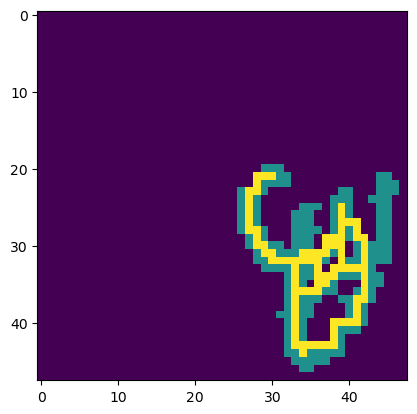

In [98]:
d = distance_transform(img2)
MC = mc.MorseComplex(d)
MC.process_lower_stars()
MC.cancel_low_persistence_pairs_below(0,0.5)
MC.extract_morse_skeleton_below(0)
voxels = MC.get_morse_skeleton_below()
skel = np.zeros_like(img2)
for voxel in voxels:
    skel[voxel[0],voxel[1],voxel[2]] = 1
skel = skel[0,:,:]
plt.imshow(skel+img)
print(MC.get_number_of_critical_cells(0))

Critical cells:
total: 31 41 11 0 --- < 0: 31 34 0 0 --- >= 0: 0 7 11 0                    [[1, 11, 11, 0], [1, 4, 0, 0], [0, 7, 11, 0]]
total: 1 11 11 0 --- < 0: 1 4 0 0 --- >= 0: 0 7 11 0                       


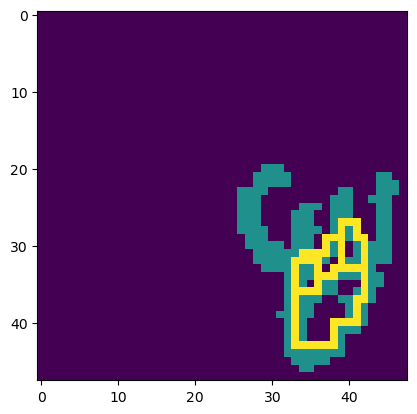

In [99]:
d = distance_transform(img2)
MC = mc.MorseComplex(d)
MC.process_lower_stars()
MC.cancel_low_persistence_pairs_below(0,2)
MC.extract_morse_skeleton_below(0)
voxels = MC.get_morse_skeleton_below()
skel = np.zeros_like(img2)
for voxel in voxels:
    skel[voxel[0],voxel[1],voxel[2]] = 1
skel = skel[0,:,:]
plt.imshow(skel+img)
print(MC.get_number_of_critical_cells(0))

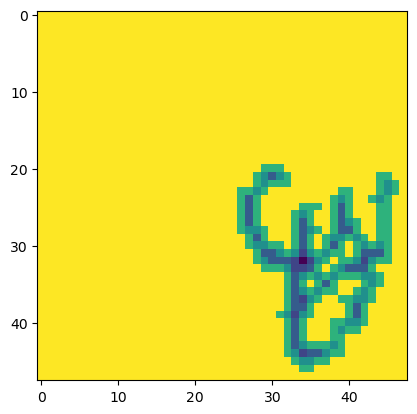

In [100]:
d_plot = d[0,:,:]
d_plot[d_plot > 0] = 0
plt.imshow(d_plot)

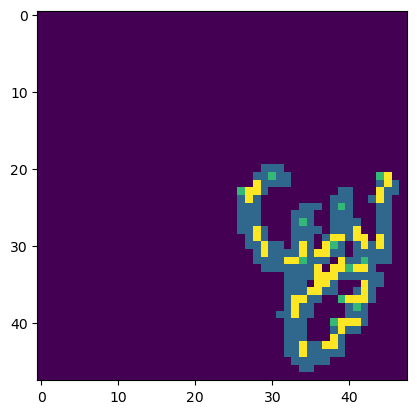

In [103]:
cells = MC.get_critical_cells()
critical = np.zeros_like(img)
for dim in [0,1]:
    critical_voxels = []
    for cell in cells[dim]:
        if cell.birth <= 0:
            critical_voxels.append(cell.get_voxels())
    for voxels in critical_voxels:
        for c in voxels:
            critical[c[1],c[2]] = dim+1
plt.imshow(critical+img)

birth=-1.414214, x=0, y=22, z=45, type=0, dim=0
[(birth=-1.000000, x=0, y=23, z=44, type=1, dim=1, 1)]
birth=-1.000000, x=0, y=23, z=44, type=1, dim=1
1 2
birth=-1.414214, x=0, y=22, z=45, type=0, dim=0
birth=-1.000000, x=0, y=23, z=44, type=1, dim=1


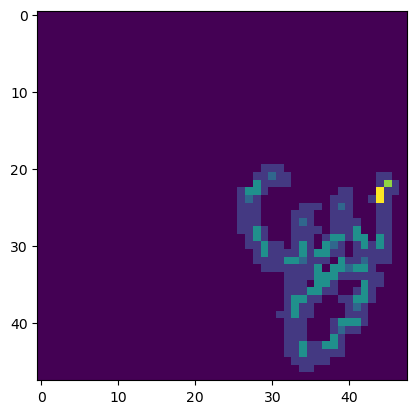

In [114]:
cells = MC.get_critical_cells()
critical = np.zeros_like(img)
for dim in [0,1]:
    critical_voxels = []
    for cell in cells[dim]:
        if cell.birth <= 0:
            critical_voxels.append(cell.get_voxels())
    for voxels in critical_voxels:
        for c in voxels:
            critical[c[1],c[2]] = dim+1

m = -np.inf
i = -1
for index,cell in enumerate(cells[0]):
    if cell.birth > m:
        m = cell.birth
        i = index

print(cells[0][i])
coboundary = MC.get_morse_coboundary(cells[0][i])
print(coboundary)
m = np.inf
for b in coboundary:
    if b[1] == 1 and b[0].birth <= 0:
        if b[0].birth < m:
            m = b[0].birth
            pair = b[0]
print(pair)       
j = -1
for index,cell in enumerate(cells[1]):
    if cell.get_voxels() == pair.get_voxels():
        j = index
        break
print(i,j)
print(cells[0][i])
print(cells[1][j])

voxels = cells[0][i].get_voxels()
for voxel in voxels:
    critical[voxel[1],voxel[2]] += 3
voxels = cells[1][j].get_voxels()
for voxel in voxels:
    critical[voxel[1],voxel[2]] += 3

plt.imshow(critical+img)

[[27, 37, 11, 0], [27, 30, 0, 0], [0, 7, 11, 0]]


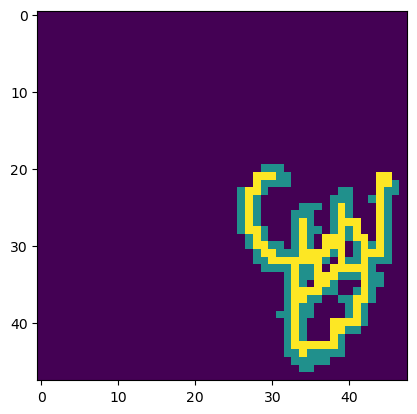

In [113]:
MC.cancel_pair(1,j,0,i)
MC.extract_morse_skeleton_below(0)
voxels = MC.get_morse_skeleton_below()
skel = np.zeros_like(img2)
for voxel in voxels:
    skel[voxel[0],voxel[1],voxel[2]] = 1
skel = skel[0,:,:]
plt.imshow(skel+img)
print(MC.get_number_of_critical_cells(0))

In [ ]:
cells = MC.get_critical_cells()
critical = np.zeros_like(img)
for dim in [0,1]:
    critical_voxels = []
    for cell in cells[dim]:
        if cell.birth <= 0:
            critical_voxels.append(cell.get_voxels())
    for voxels in critical_voxels:
        for c in voxels:
            critical[c[1],c[2]] = dim+1

m = -np.inf
i = -1
for index,cell in enumerate(cells[0]):
    if cell.birth > m:
        m = cell.birth
        i = index

print(cells[0][i])
coboundary = MC.get_morse_coboundary(cells[0][i])
print(coboundary)
m = np.inf
for b in coboundary:
    if b[1] == 1 and b[0].birth <= 0:
        if b[0].birth < m:
            m = b[0].birth
            pair = b[0]
print(pair)       
j = -1
for index,cell in enumerate(cells[1]):
    if cell.get_voxels() == pair.get_voxels():
        j = index
        break
print(i,j)
print(cells[0][i])
print(cells[1][j])

voxels = cells[0][i].get_voxels()
for voxel in voxels:
    critical[voxel[1],voxel[2]] += 3
voxels = cells[1][j].get_voxels()
for voxel in voxels:
    critical[voxel[1],voxel[2]] += 3

plt.imshow(critical+img)

In [ ]:
MC.check_gradient_vectorfield()

In [ ]:
MC.extract_morse_skeleton_below(0)
voxels = MC.get_morse_skeleton_below()
skel = np.zeros_like(img2)
for voxel in voxels:
    skel[voxel[0],voxel[1],voxel[2]] = 1
skel = skel[0,:,:]
plt.imshow(skel+img)
print(MC.get_number_of_critical_cells(0))

In [ ]:
i = 0
boundary = MC.get_morse_coboundary(cells[0][i])
boundary
for i,cell in enumerate(cells[1]):
    if cell.get_voxels() == boundary[0][0].get_voxels():
        print(cell)
        j = i
        break
MC.cancel_pair(0,i,1,j)

In [ ]:
MC.extract_morse_skeleton_below(0)
voxels = MC.get_morse_skeleton_below()
skel = np.zeros_like(img2)
for voxel in voxels:
    skel[voxel[0],voxel[1],voxel[2]] = 1
skel = skel[0,:,:]
plt.imshow(skel+img)
print(MC.get_number_of_critical_cells(0))

In [ ]:
cells = MC.get_critical_cells()
critical = np.zeros_like(img)
for dim in [0,1]:
    critical_voxels = []
    for cell in cells[dim]:
        if cell.birth <= 0:
            critical_voxels.append(cell.get_voxels())
    for voxels in critical_voxels:
        for c in voxels:
            critical[c[1],c[2]] = dim+1
plt.imshow(critical+img)

In [ ]:
cells[0]

In [ ]:
i = 0
boundary = MC.get_morse_coboundary(cells[0][i])
boundary
for i,cell in enumerate(cells[1]):
    if cell.get_voxels() == boundary[0][0].get_voxels():
        print(cell)
        j = i
        break
MC.cancel_pair(0,i,1,j)

In [ ]:
MC.extract_morse_skeleton_below(0)
voxels = MC.get_morse_skeleton_below()
skel = np.zeros_like(img2)
for voxel in voxels:
    skel[voxel[0],voxel[1],voxel[2]] = 1
skel = skel[0,:,:]
plt.imshow(skel+img)
print(MC.get_number_of_critical_cells(0))

In [ ]:
cells = MC.get_critical_cells()
critical = np.zeros_like(img)
for dim in [0,1]:
    critical_voxels = []
    for cell in cells[dim]:
        if cell.birth <= 0:
            critical_voxels.append(cell.get_voxels())
    for voxels in critical_voxels:
        for c in voxels:
            critical[c[1],c[2]] = dim+1
plt.imshow(critical+img)

In [ ]:
cells[0]

In [ ]:
i = 1
boundary = MC.get_morse_coboundary(cells[0][i])
boundary
for i,cell in enumerate(cells[1]):
    if cell.get_voxels() == boundary[0][0].get_voxels():
        print(cell)
        j = i
        break
MC.cancel_pair(0,i,1,j)

In [ ]:
MC.extract_morse_skeleton_below(0)
voxels = MC.get_morse_skeleton_below()
skel = np.zeros_like(img2)
for voxel in voxels:
    skel[voxel[0],voxel[1],voxel[2]] = 1
skel = skel[0,:,:]
plt.imshow(skel+img)
print(MC.get_number_of_critical_cells(0))